In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [4]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# Part 1:
## Understandign Product Categories

### 1.1 Frecuency Tables:

In [5]:
df["category"].nunique()

296

In [6]:
# Frecuency table for the product "category"
df["category"].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [7]:
# Top 5 most listed product categories
df['category'].value_counts().head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

### 1.2 Visualization

In [8]:
# Distribution of products across different categories
top_10_categories = df['category'].value_counts().head(10)

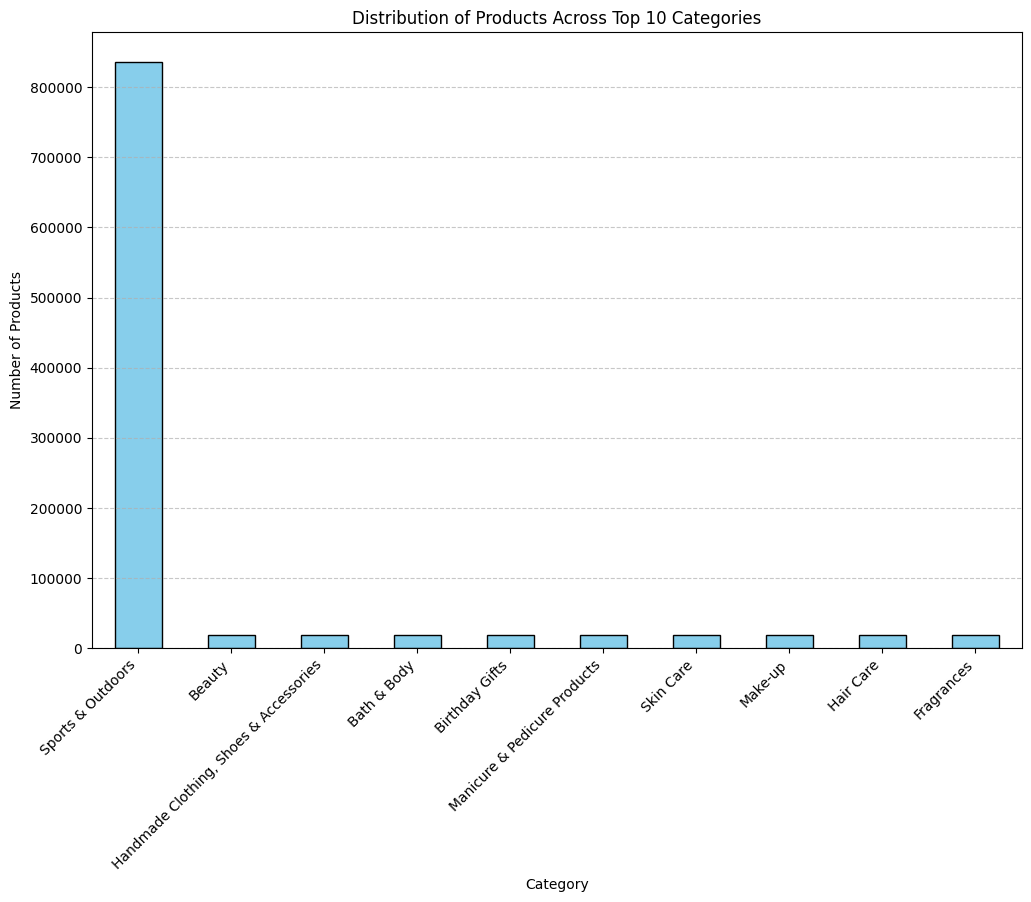

In [20]:
# Plotting the histogram using Matplotlib
top_10_categories = df['category'].value_counts().nlargest(10)

plt.figure(figsize=(12, 8))
top_10_categories.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Products Across Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

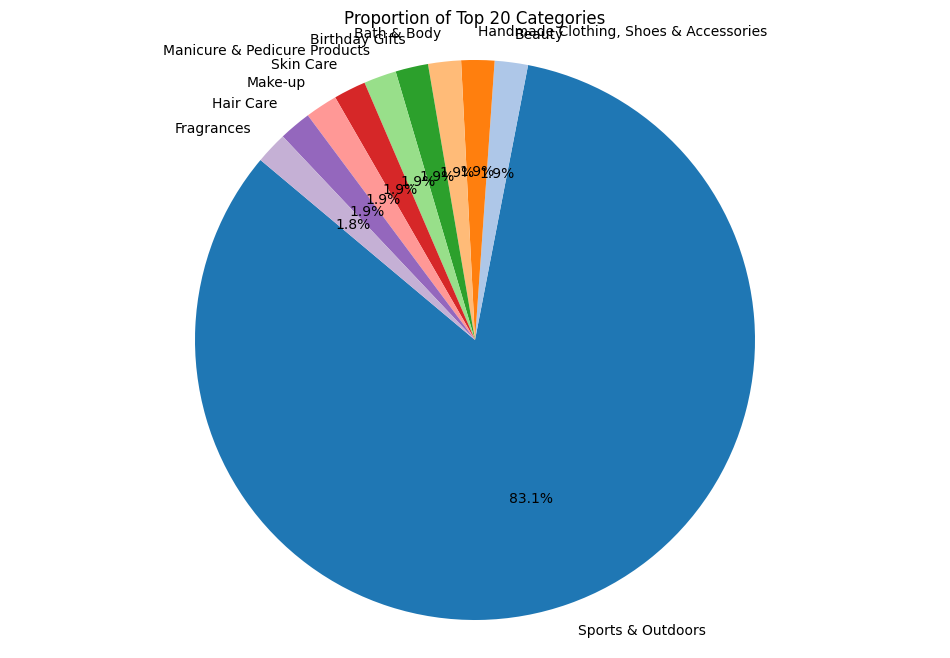

In [22]:
# For a subset of top categories, visualize their proportions using a pie chart.
plt.figure(figsize=(12, 8))
plt.pie(top_10_categories, labels=top_10_categories.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Proportion of Top 20 Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Part 2:

## Delving into Product Pricing

### 2.1 Measures of centrality

In [23]:
# Calculate the mean, median, and mode for the price of products
df['price'].mean()

np.float64(89.24380943923663)

In [24]:
df['price'].median()

np.float64(19.09)

In [25]:
df['price'].mode()

0    9.99
Name: price, dtype: float64

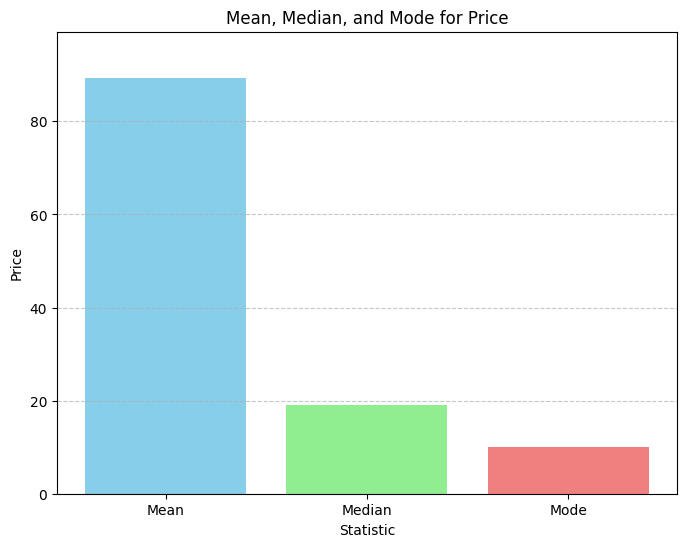

In [26]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

stats = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode'],
    'Price': [mean_price, median_price, mode_price]
})

plt.figure(figsize=(8, 6))
plt.bar(stats['Statistic'], stats['Price'], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Mean, Median, and Mode for Price')
plt.xlabel('Statistic')
plt.ylabel('Price')
plt.ylim(0, max(stats['Price']) + 10)  # Adjust the y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2.2 Measures of Dispersion

In [15]:
# Calculate variance
variance_price = df['price'].var()

# Calculate standard deviation
std_dev_price = df['price'].std()

# Calculate range
price_range = df['price'].max() - df['price'].min()

# Calculate interquartile range (IQR)
q75_price = df['price'].quantile(0.75)
q25_price = df['price'].quantile(0.25)
iqr_price = q75_price - q25_price

# Print the results with 2 decimal places
print(f"Variance of price: {variance_price:.2f}")
print(f"Standard deviation of price: {std_dev_price:.2f}")
print(f"Range of price: {price_range:.2f}")
print(f"Interquartile range (IQR) of price: {iqr_price:.2f}")

Variance of price: 119445.49
Standard deviation of price: 345.61
Range of price: 100000.00
Interquartile range (IQR) of price: 36.00


### 2.3 Visualization

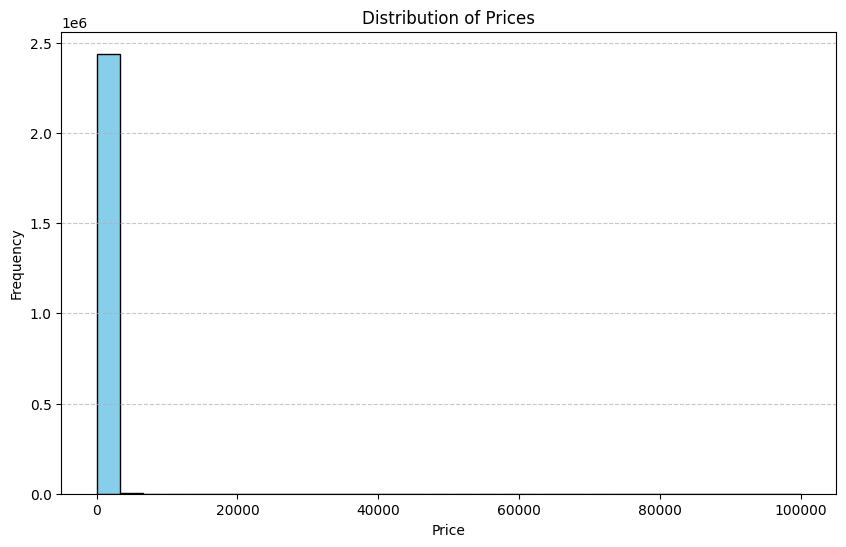

In [28]:
# Plotting the histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
df['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

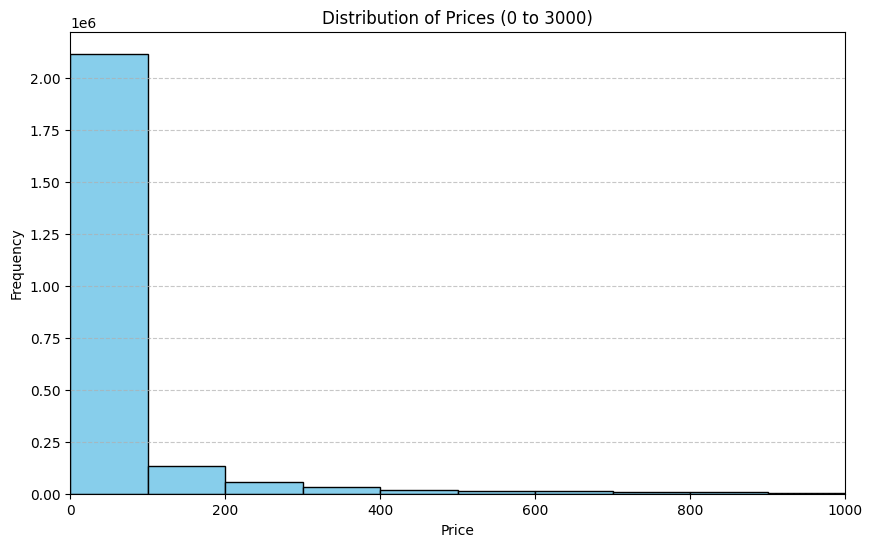

In [45]:
# Filter the data to include only prices from 0 to 3000
filtered_prices = df['price'][df['price'] <= 3000]

# Plotting the histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(filtered_prices, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices (0 to 3000)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Set x-axis limit
plt.xlim(0, 1000)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

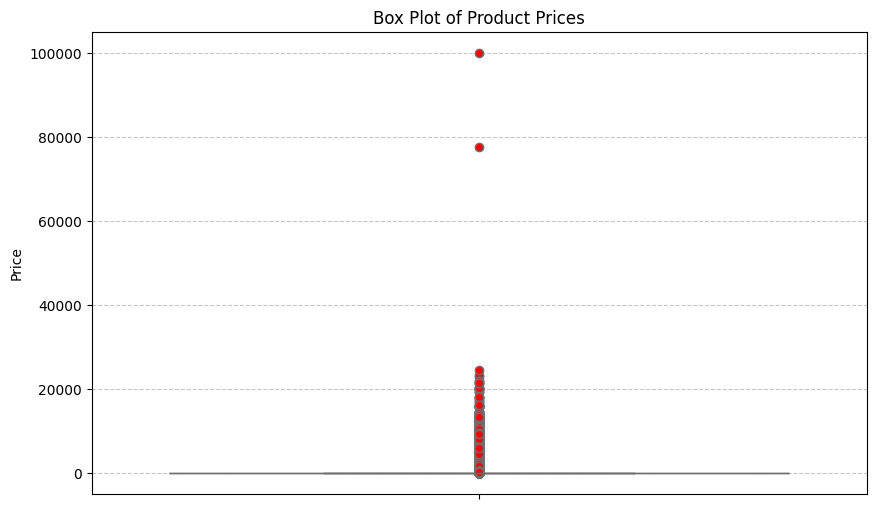

In [37]:
# Plotting the vertical box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'], color='skyblue', 
            flierprops=dict(markerfacecolor='red', marker='o', linestyle='none'))
plt.title('Box Plot of Product Prices')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Part: 3

## Unpacking Product Rating

### 3.1 Measures of Centrality:

In [19]:
# Determine the variance, standard deviation, and interquartile range for product rating.

# Calculate variance
variance_rating = df['stars'].var()

# Calculate standard deviation
std_dev_rating = df['stars'].std()

# Calculate interquartile range (IQR)
q75_rating = df['stars'].quantile(0.75)
q25_rating = df['stars'].quantile(0.25)
iqr_rating = q75_rating - q25_rating

# Print the results
print(f"Variance of rating: {variance_rating}")
print(f"Standard deviation of rating: {std_dev_rating}")
print(f"Interquartile range (IQR) of rating: {iqr_rating}")

Variance of rating: 4.817434029796862
Standard deviation of rating: 2.1948653785134207
Interquartile range (IQR) of rating: 4.4


### 3.2 Measures of Dispersion:

In [47]:
# Determine the variance, standard deviation, and interquartile range for product rating.
# Variance
variance_stars = df['stars'].var()

# Standard Deviation
std_dev_stars = df['stars'].std()

# Interquartile Range (IQR)
Q1 = df['stars'].quantile(0.25)
Q3 = df['stars'].quantile(0.75)
IQR = Q3 - Q1

# Print the results with 2 decimal precision
print(f"Variance: {variance_stars:.2f}")
print(f"Standard Deviation: {std_dev_stars:.2f}")
print(f"Interquartile Range (IQR): {IQR:.2f}")

Variance: 4.82
Standard Deviation: 2.19
Interquartile Range (IQR): 4.40


### 3.3 Shape of the Distribution:

In [49]:
# Calculate the skewness and kurtosis for the rating column.

skewness_stars = stats.skew(df['stars'].dropna())

# Calculate kurtosis
kurtosis_stars = stats.kurtosis(df['stars'].dropna())

# Print the results with 2 decimal precision
print(f"Skewness: {skewness_stars:.2f}")
print(f"Kurtosis: {kurtosis_stars:.2f}")

Skewness: 0.08
Kurtosis: -1.93


### 3.4 Visualizations

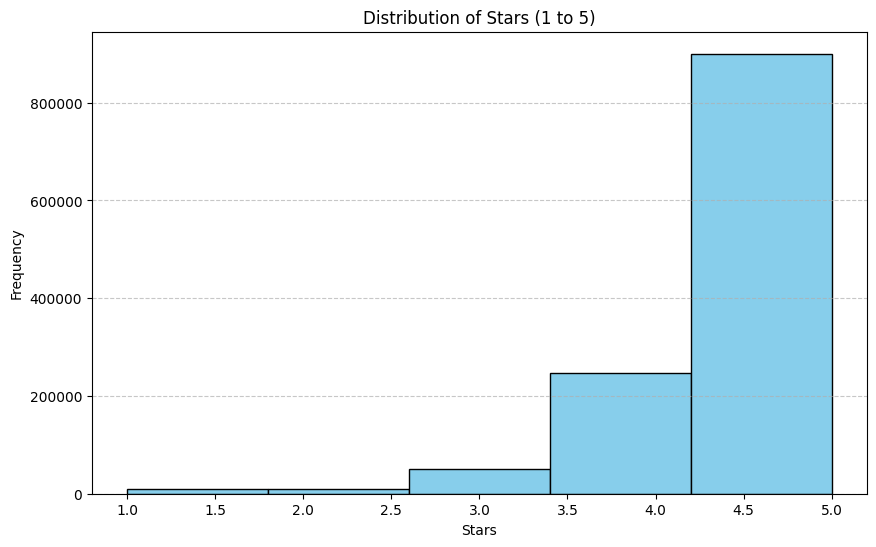

In [51]:
# Plot a histogram to visualize the distribution of product ratings.

filtered_stars = df['stars'][(df['stars'] >= 1) & (df['stars'] <= 5)]

# Plotting the histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(filtered_stars, bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Stars (1 to 5)')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()